# Problem Set 2 CS129.18

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## Requirements


>Gotta catch 'em all.

Using the lessons on Logistic Regression, and the other resource notebooks, show the following in this Jupyter Notebook.

Write your answers down as Markdown cells or comments in the code.

1. How many Legendary Pokemon are there? ( 1pt )

2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )

3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )

4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )

5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )

6. What is the accuracy of your model?( 2pts )

7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )



-----


Bonus 1 : What is the difference between machine learning and pattern recognition? (1pt)

Bonus 2:  Who is your favorite Pokemon?

----

**Submit this file on Moodle on the submission link I will provide. This is due September 25 12nn.**

In [475]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [476]:
df = pd.read_csv("data/Pokemon.csv")

In [477]:
df.sample(10)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
154,155,Cyndaquil,Fire,NaN,309,39,52,43,60,50,...,Yellow,True,0.875,Field,NaN,False,0.51,7.9,45,bipedal_tailless
673,674,Pancham,Fighting,NaN,348,67,82,62,46,48,...,White,True,0.500,Field,Human-Like,False,0.61,8.0,220,bipedal_tailed
448,449,Hippopotas,Ground,NaN,330,68,72,78,38,42,...,Brown,True,0.500,Field,NaN,False,0.79,49.5,140,quadruped
445,446,Munchlax,Normal,NaN,390,135,85,40,40,85,...,Black,True,0.875,Undiscovered,NaN,False,0.61,105.0,50,bipedal_tailless
585,586,Sawsbuck,Normal,Grass,475,80,100,70,60,70,...,Brown,True,0.500,Field,NaN,False,1.91,92.5,75,quadruped
376,377,Regirock,Rock,NaN,580,80,100,200,50,100,...,Brown,False,NaN,Undiscovered,NaN,False,1.70,230.0,3,bipedal_tailless
346,347,Anorith,Rock,Bug,355,45,95,50,40,50,...,Grey,True,0.875,Water_3,NaN,False,0.71,12.5,45,insectoid
166,167,Spinarak,Bug,Poison,250,40,60,40,40,40,...,Green,True,0.500,Bug,NaN,False,0.51,8.5,255,insectoid
187,188,Skiploom,Grass,Flying,340,55,45,50,45,65,...,Green,True,0.500,Fairy,Grass,False,0.61,1.0,120,bipedal_tailed
556,557,Dwebble,Bug,Rock,325,50,65,85,35,35,...,Red,True,0.500,Bug,Mineral,False,0.30,14.5,190,insectoid


## 1. How many Legendary Pokemon are there? ( 1pt )
---

In [478]:
mask = df['isLegendary']
legendary_ctr = df['Name'].loc[mask].count()

print(f'There are <{legendary_ctr}> legendary pokemons in this dataset!')

There are <46> legendary pokemons in this dataset!


In [479]:
print(df.groupby(['isLegendary'])['isLegendary'].count())

isLegendary
False    675
True      46
Name: isLegendary, dtype: int64


## 2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP) ( 3pts )
---

In [480]:
df['hpToAtkRatio'] = df['Attack'] / df['HP']
df[['Name', 'HP', 'Attack', 'hpToAtkRatio']].sort_values(by=['hpToAtkRatio'], ascending=False)

,Name,HP,Attack,hpToAtkRatio
291,Shedinja,1,90,90.000000
49,Diglett,10,55,5.500000
97,Krabby,30,105,3.500000
385,Deoxys,50,150,3.000000
139,Kabuto,30,80,2.666667
...,...,...,...,...
359,Wynaut,95,23,0.242105
201,Wobbuffet,190,33,0.173684
439,Happiny,100,5,0.050000
241,Blissey,255,10,0.039216


## 3. Build a binary classifier for whether Pokemon are Fire Type or not. ( 4pts )
---

In [481]:
# convert Type_1 and Type_2 entries to 'True' if == to 'Fire'. Else, convert to "False" 

df['isFireType'] = (df['Type_1'].eq('Fire')) | (df['Type_2'].eq('Fire'))
df[['Name', 'Type_1', 'Type_2', 'isFireType']]

,Name,Type_1,Type_2,isFireType
0,Bulbasaur,Grass,Poison,False
1,Ivysaur,Grass,Poison,False
2,Venusaur,Grass,Poison,False
3,Charmander,Fire,NaN,True
4,Charmeleon,Fire,NaN,True
...,...,...,...,...
716,Yveltal,Dark,Flying,False
717,Zygarde,Dragon,Ground,False
718,Diancie,Rock,Fairy,False
719,Hoopa,Psychic,Ghost,False


## 4. Describe the attributes and stats of all Legendary Type pokemon using boxplots. ( 5pts )
---

<AxesSubplot:>

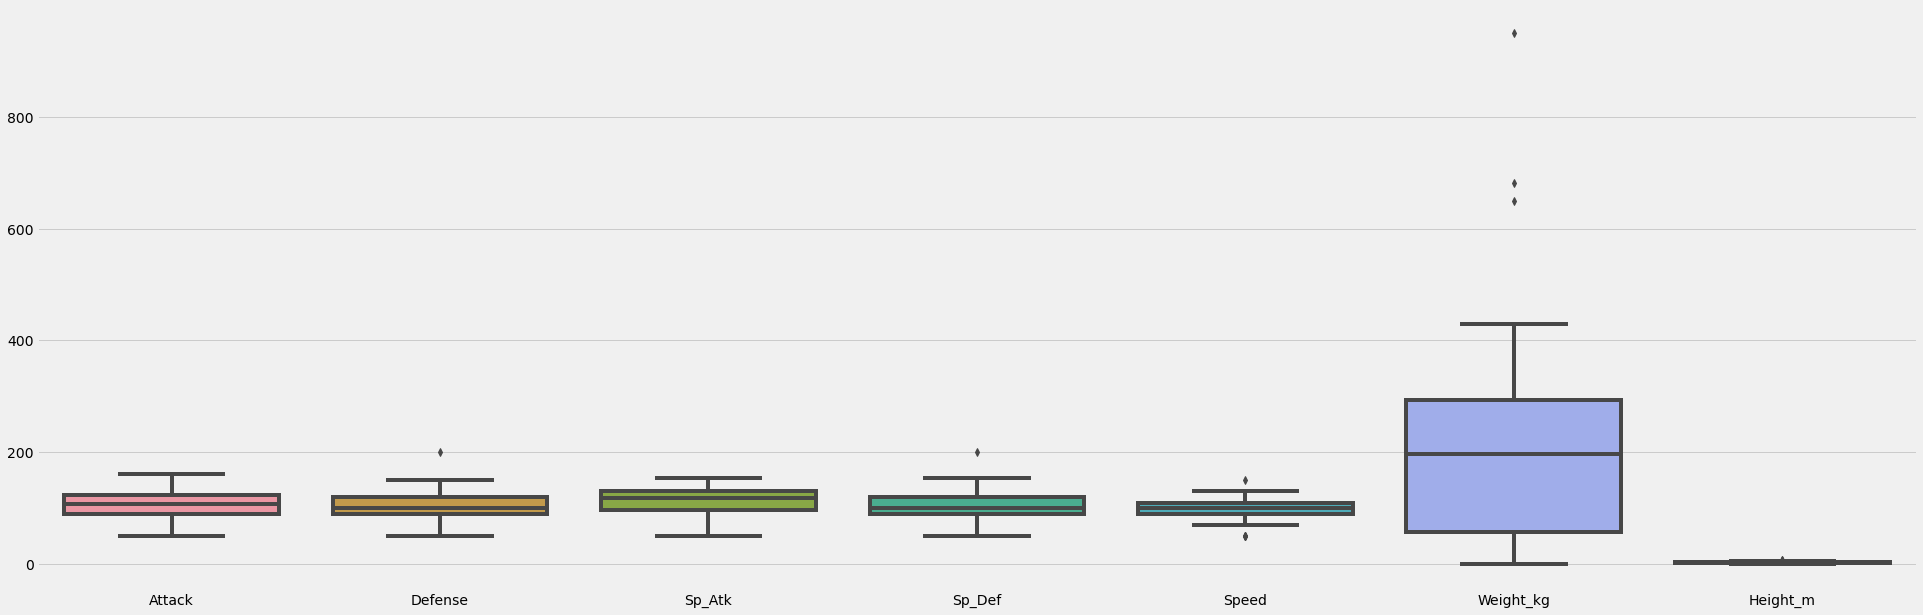

In [523]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 10))

mask = df['isLegendary']
dfl = df.loc[mask]
dfl = dfl[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]

sns.boxplot(data = dfl)

<AxesSubplot:>

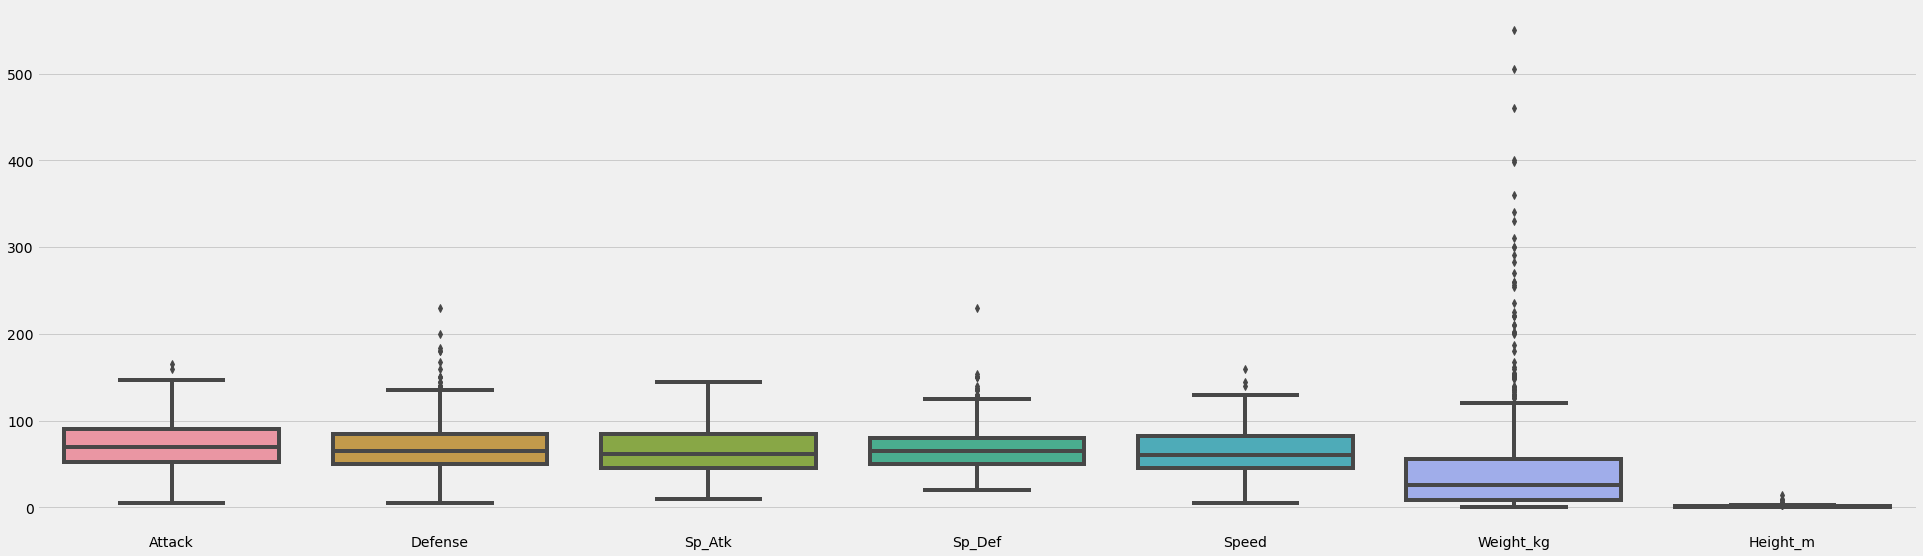

In [522]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(30, 9))

mask = df['isLegendary'] == False
dfnl = df.loc[mask]
dfnl = dfnl[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
sns.boxplot(data = dfnl)

## 5. Solve for the probabilities of each Pokemon being a Fire Type. ( 2pts )
---
## 6. What is the accuracy of your model? ( 2pts )

In [483]:
# check which cols have NULL entries

null_cols = df.columns[df.isna().any()].tolist()
print(f'\nColumns with NULL entries: {null_cols}\n')


Columns with NULL entries: ['Type_2', 'Pr_Male', 'Egg_Group_2']



<AxesSubplot:>

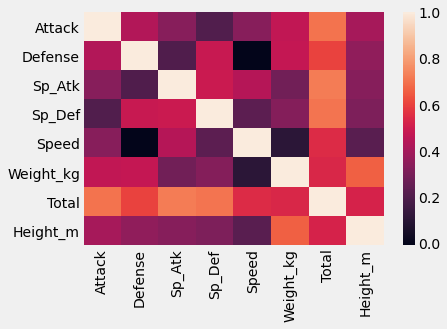

In [484]:
sns.heatmap(df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", 'Total', 'Height_m']].corr())

In [485]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = df[['Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Weight_kg', 'Total']]

logistic_model = LogisticRegression(class_weight="balanced")
logistic_model.fit(X, df["isFireType"])

predictions = logistic_model.predict(X)
accuracy = metrics.accuracy_score(predictions, df["isFireType"])

print(f'\nCoefficient values: {logistic_model.coef_}')
print(f'\nAccuracy = {accuracy * 100:.4f}\n')


Coefficient values: [[ 0.03064782 -0.00666959  0.05397643  0.00511607  0.01628875  0.00055906
  -0.01611444]]

Accuracy = 71.4286



In [486]:
df["pred"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(X)]

df["prob"] = prob
selection = df[['Name', 'Type_1', 'Type_2', 'isFireType', 'pred', 'prob']]

print('\nProbabilities of each pokemon being a Fire Type:\n')
selection[(selection['isFireType'] == True)].sample(10).sort_values(by=['prob'])


Probabilities of each pokemon being a Fire Type:



,Name,Type_1,Type_2,isFireType,pred,prob
218,Magcargo,Fire,Rock,True,False,0.212511
554,Darmanitan,Fire,NaN,True,False,0.270358
36,Vulpix,Fire,NaN,True,False,0.397820
662,Talonflame,Fire,Flying,True,False,0.425407
635,Larvesta,Bug,Fire,True,False,0.432633
155,Quilava,Fire,NaN,True,True,0.581971
390,Monferno,Fire,Fighting,True,True,0.655535
156,Typhlosion,Fire,NaN,True,True,0.681117
322,Camerupt,Fire,Ground,True,True,0.790717
636,Volcarona,Bug,Fire,True,True,0.792361


In [487]:
from sklearn.model_selection import train_test_split

logistic_model = LogisticRegression(class_weight="balanced")

X_train, X_test, Y_train, Y_test = train_test_split(X, df['isFireType'], train_size = 0.55)

logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)

print(f'\nTrain Accuracy = {train_accuracy * 100:.4f}')
print(f'Test Accuracy = {test_accuracy * 100:.4f}\n')


Train Accuracy = 75.2525
Test Accuracy = 66.4615



In [488]:
print(f'\nAccuracy: {metrics.accuracy_score(Y_test, pred_test) * 100:.4f}')
print(f'Precision: {metrics.precision_score(Y_test, pred_test) * 100:.4f}')
print(f'Recall: {metrics.recall_score(Y_test, pred_test) * 100:.4f}\n')


Accuracy: 66.4615
Precision: 14.9123
Recall: 58.6207



Text(0.5, 257.44, 'Predicted label')

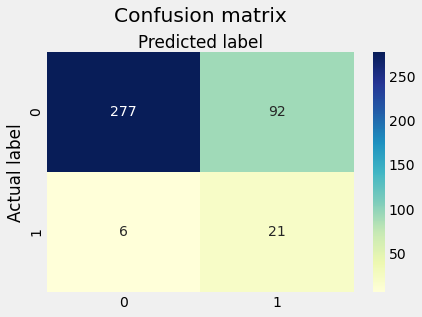

In [489]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_train, pred_train)
cnf_matrix

class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. ( 3pts )
---

In [490]:
print(df.groupby(['isFireType'])['isFireType'].count())

isFireType
False    665
True      56
Name: isFireType, dtype: int64


In [491]:
from sklearn.utils import resample

X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Total", ]]

X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isFireType"], 
                   test_size=0.3,  
                   train_size=0.7,    
                   random_state=42)

X = pd.concat([X_train, Y_train], axis=1)

# separate minority and majority classes
not_legendary = X[X.isFireType==False]
legendary = X[X.isFireType==True]

# upsample minority
legendary_upsampled = resample(legendary,
                      replace=True, # sample with replacement
                      n_samples=len(not_legendary), # match number in majority class
                      random_state=42) # reproducible results

# combine majority and upsampled minority
legendary_upsampled = pd.concat([not_legendary, legendary_upsampled])

# check new class counts
legendary_upsampled.isFireType.value_counts()

True     461
False    461
Name: isFireType, dtype: int64

In [492]:
Y_train = legendary_upsampled.isFireType
X_train = legendary_upsampled.drop('isFireType', axis=1)

legendary_upsampled = LogisticRegression(class_weight="balanced", solver="liblinear").fit(X_train, Y_train)
upsampled_pred = legendary_upsampled.predict(X_test)

print(f'\nAccuracy: {metrics.accuracy_score(Y_test, upsampled_pred) * 100:.4f}')
print(f'Precision: {metrics.precision_score(Y_test, upsampled_pred) * 100:.4f}')
print(f'Recall: {metrics.recall_score(Y_test, upsampled_pred) * 100:.4f}\n')


Accuracy: 76.0369
Precision: 15.7895
Recall: 69.2308



Text(0.5, 257.44, 'Predicted label')

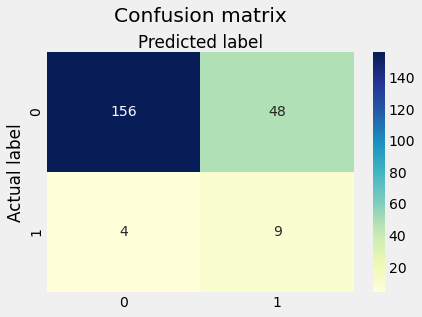

In [493]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, upsampled_pred)
cnf_matrix

class_names=["0","1"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')